In [2]:
using Plots,LinearAlgebra

Exemple minimal de système métastable à 4 états: processus de saut discret:

- $A \to B$ (resp. $B \to A$) à un taux $r_{AB}$ (resp. $r_{BA}$)
- $C \to D$ (resp. $D \to C$) à un taux $r_{CD}$ (resp. $r_{DC}$)
- $B \to C$ (resp. $C\to B$ à un taux $\varepsilon_{BC}$ (resp. $\varepsilon_{CB}$)
- $A$ et $D$ ne communiquent pas directement.

On suppose tous les taux strictement positifs.
Si les $\varepsilon \ll r$, les paires $\{A,B\}$, $\{C,D\}$ sont métastables. On voit $A$ et $D$ comme des modèles de coreset. Le générateur à l'équilibre est donc

$$L_0 = \begin{pmatrix} -r_{AB}& r_{A B} &0&0 \\ r_{BA} & -(r_{BA}+\varepsilon_{BC}) & \varepsilon_{BC}&0\\ 0&\varepsilon_{CB} & -(r_{CD}+\varepsilon_{CB})&r_{CD}\\ 0 & 0 & r_{DC}&-r_{DC}\end{pmatrix}$$

On rajoute un taux de mort $\alpha=(\alpha_A,\alpha_B,\alpha_C,\alpha_D)$ sur la diagonale, en imposant $\alpha_A = 0$, $\alpha_D = +\infty$, et on veut maximiser $\lambda_2/\lambda_1$, ce qui revient au problème

$$\max_{\alpha_B,\alpha_C \geq 0} \frac{\lambda_2(M_\alpha)}{\lambda_1(M_\alpha)},$$

où 
    $$ M_\alpha = \begin{pmatrix} -r_{AB}& r_{A B} &0 \\ r_{BA} & -(r_{BA}+\varepsilon_{BC}+\alpha_B) & \varepsilon_{BC}\\ 0&\varepsilon_{CB} & -(r_{CD}+\varepsilon_{CB}+\alpha_C)\end{pmatrix},$$

et où $-\lambda_k(M_\alpha)$ désigne la $k$-ième valeur propre de $M_\alpha$, qui est symétrique définie négative pour $\ell^2(\mu)$, $\mu L_0 = \mu$.

In [176]:
r_ab = 1
r_ba = 3

r_cd = 1
r_dc = 1

ε_bc = 1e-1
ε_cb = 2e-1

L = [-r_ab r_ab 0 0 ; r_ba -(r_ba +ε_bc) ε_bc 0; 0 ε_cb -(r_cd + ε_cb) r_cd; 0 0 r_dc -r_dc]

@show L

L = [-1.0 1.0 0.0 0.0; 3.0 -3.1 0.1 0.0; 0.0 0.2 -1.2 1.0; 0.0 0.0 1.0 -1.0]


4×4 Matrix{Float64}:
 -1.0   1.0   0.0   0.0
  3.0  -3.1   0.1   0.0
  0.0   0.2  -1.2   1.0
  0.0   0.0   1.0  -1.0

In [177]:
λs,us = eigen(-transpose(L))
println(λs)
mu = abs.(us[:,1])
mu /= sum(mu)

B = Symmetric(diagm(mu))

λs,us = eigen(-L)
@show mu

[1.0515343785144694e-16, 0.11656021090830639, 2.102035625556025, 4.081404163535664]
mu = [0.6, 0.19999999999999957, 0.10000000000000023, 0.1000000000000002]


4-element Vector{Float64}:
 0.6
 0.19999999999999957
 0.10000000000000023
 0.1000000000000002

In [178]:
λs,us=eigen(Symmetric(-B*L),B)
u1 = us[:,1]
println(u1 / sum(u1))
println(mu)
H = B*L

[0.2500000000000031, 0.2500000000000034, 0.24999999999999709, 0.2499999999999965]
[0.6, 0.19999999999999957, 0.10000000000000023, 0.1000000000000002]


4×4 Matrix{Float64}:
 -0.6   0.6    0.0    0.0
  0.6  -0.62   0.02   0.0
  0.0   0.02  -0.12   0.1
  0.0   0.0    0.1   -0.1

In [179]:
u1 = us[:,1]
u2 = us[:,2]
u3 = us[:,3]
u4 = us[:,4]

@show u2'*B*u4

u2' * B * u4 = -7.922817808919239e-17


-7.922817808919239e-17

In [180]:
B_Ω = B[1:3,1:3]
M(α_b,α_c) = Symmetric(B_Ω*[-r_ab r_ab 0 ; r_ba -(r_ba +ε_bc + α_b) ε_bc ; 0 ε_cb -(r_cd + ε_cb + α_c)])

α_b = 0.0
α_c = 0.0

λs,us = eigen(-M(α_b,α_c),B_Ω)
λ1,λ2 = real.(λs)

println(λ2/λ1)

58.647365669182385


In [181]:
α_b = 0.0

λ1s = Float64[]
λ2s = Float64[]

α_range = range(0,100,1000)

for α_c = α_range
    
    #α_b = t*α_b1 + (1-t)*α_b2
    #α_c = t*α_c1 + (1-t)*α_c2
    
    λs,us = eigen(-M(α_b,α_c),)
    λ1,λ2 = real.(λs)
    
    push!(λ1s,λ1)
    push!(λ2s,λ2)
end

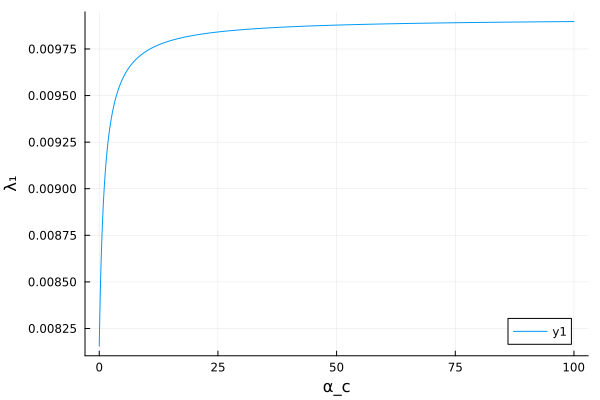

In [182]:
plot(α_range,λ1s,xlabel="α_c",ylabel="λ₁")

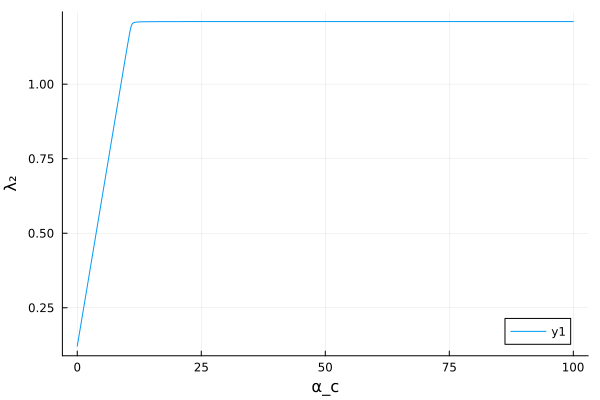

In [183]:
plot(α_range,λ2s,xlabel="α_c",ylabel="λ₂")

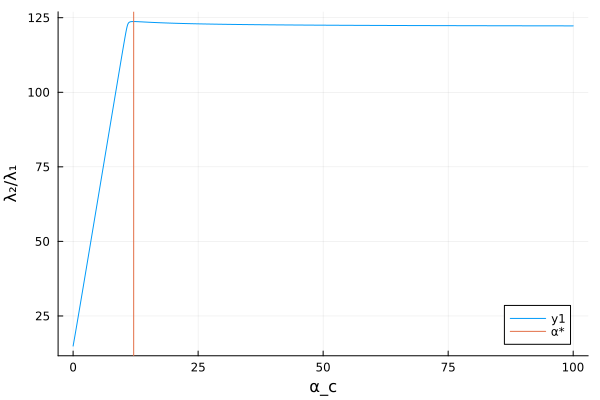

In [184]:
plot(α_range,λ2s ./ λ1s,xlabel="α_c",ylabel="λ₂/λ₁")
vline!([α_range[argmax((λ2s-λ1s) ./ λ1s)]],label="α*")

122